# Plot 2D Rays

0 0
Processing file: /home/pedro/Desktop/Jipole/output/pixel00_coordinates_ipole.txt
File /home/pedro/Desktop/Jipole/output/pixel00_coordinates_ipole.txt does not exist, skipping.
0 1
Processing file: /home/pedro/Desktop/Jipole/output/pixel01_coordinates_ipole.txt
File /home/pedro/Desktop/Jipole/output/pixel01_coordinates_ipole.txt does not exist, skipping.
0 2
Processing file: /home/pedro/Desktop/Jipole/output/pixel02_coordinates_ipole.txt
File /home/pedro/Desktop/Jipole/output/pixel02_coordinates_ipole.txt does not exist, skipping.
0 3
Processing file: /home/pedro/Desktop/Jipole/output/pixel03_coordinates_ipole.txt
File /home/pedro/Desktop/Jipole/output/pixel03_coordinates_ipole.txt does not exist, skipping.
1 0
Processing file: /home/pedro/Desktop/Jipole/output/pixel10_coordinates_ipole.txt
File /home/pedro/Desktop/Jipole/output/pixel10_coordinates_ipole.txt does not exist, skipping.
1 1
Processing file: /home/pedro/Desktop/Jipole/output/pixel11_coordinates_ipole.txt
File /home/pedr

/tmp/ipykernel_12491/385149828.py:66: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
/tmp/ipykernel_12491/385149828.py:74: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()
/tmp/ipykernel_12491/385149828.py:82: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[2].legend()


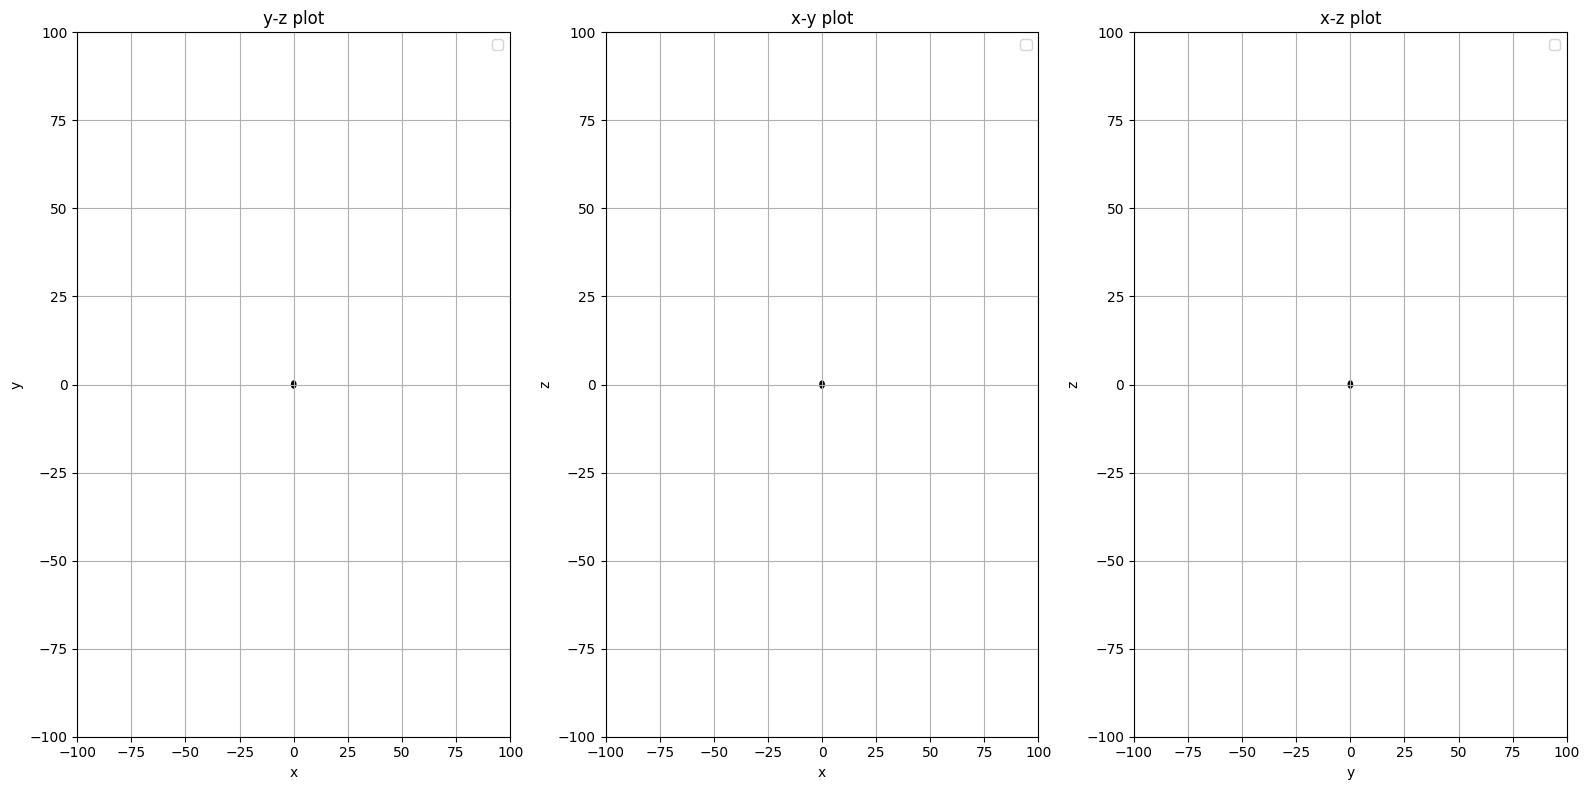

0

In [112]:
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import patches
import gc

# Directory containing the files
base_dir = '/home/pedro/Desktop/Jipole/output/'

colors = ['b', 'g', 'm', 'c', 'y', 'orange', 'purple', 'brown', 'pink', 'lime', 'navy', 'teal', 'gold', 'red', 'gray', 'olive']

# Create 1 row, 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

# Add black hole circle to each subplot
for ax in axes:
    circle = patches.Circle((0, 0), radius=1, fill=True, edgecolor='black', facecolor='black', alpha=1)
    ax.add_patch(circle)

for i in range(4):
    for j in range(4):
        print(i, j)
        r_list = []
        th_list = []
        phi_list = []
        fname = os.path.join(base_dir, f'pixel{i}{j}_coordinates_ipole.txt')
        print(f"Processing file: {fname}")

        if not os.path.exists(fname):
            print(f"File {fname} does not exist, skipping.")
            continue
        with open(fname, 'r') as f:
            for line in f:
                if 'Step' in line:
                    parts = line.split(':', 1)[1]
                    assignments = parts.split(',')
                    r = float(assignments[0].split('=')[1])
                    th = float(assignments[1].split('=')[1])
                    phi = float(assignments[2].split('=')[1])
                    if (r == 0):
                        continue
                    r_list.append(r)
                    th_list.append(th)
                    phi_list.append(phi)
        if r_list:
            r = np.array(r_list)
            th = np.array(th_list)
            phi = np.array(phi_list)
            color_idx = (i * 4 + j) % len(colors)
            # y-z plot
            x = r * np.sin(th) * np.cos(phi)
            y = r * np.sin(th) * np.sin(phi)
            z = r * np.cos(th)
            axes[0].plot(x,y, color=colors[color_idx], label=f'pixel{i}{j}')
            # x-y plot
            axes[1].plot(x, z, color=colors[color_idx], label=f'pixel{i}{j}')
            # x-z plot
            axes[2].plot(y, z, color=colors[color_idx], label=f'pixel{i}{j}')

axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_xlim(-100, 100)
axes[0].set_ylim(-100, 100)
axes[0].grid(True)
axes[0].set_title('y-z plot')
axes[0].legend()

axes[1].set_xlabel('x')
axes[1].set_ylabel('z')
axes[1].set_xlim(-100, 100)
axes[1].set_ylim(-100, 100)
axes[1].grid(True)
axes[1].set_title('x-y plot')
axes[1].legend()

axes[2].set_xlabel('y')
axes[2].set_ylabel('z')
axes[2].set_xlim(-100, 100)
axes[2].set_ylim(-100, 100)
axes[2].grid(True)
axes[2].set_title('x-z plot')
axes[2].legend()

plt.tight_layout()
plt.show()
gc.collect()

# Plot 3D rays

Processing file: /home/pedro/Desktop/Jipole/output/pixel01_coordinates.txt
File /home/pedro/Desktop/Jipole/output/pixel01_coordinates.txt does not exist, skipping.
Processing file: /home/pedro/Desktop/Jipole/output/pixel02_coordinates.txt
File /home/pedro/Desktop/Jipole/output/pixel02_coordinates.txt does not exist, skipping.
Processing file: /home/pedro/Desktop/Jipole/output/pixel03_coordinates.txt
File /home/pedro/Desktop/Jipole/output/pixel03_coordinates.txt does not exist, skipping.
Processing file: /home/pedro/Desktop/Jipole/output/pixel04_coordinates.txt
File /home/pedro/Desktop/Jipole/output/pixel04_coordinates.txt does not exist, skipping.
Processing file: /home/pedro/Desktop/Jipole/output/pixel10_coordinates.txt
File /home/pedro/Desktop/Jipole/output/pixel10_coordinates.txt does not exist, skipping.
Processing file: /home/pedro/Desktop/Jipole/output/pixel11_coordinates.txt
Processing file: /home/pedro/Desktop/Jipole/output/pixel12_coordinates.txt
Processing file: /home/pedro/D

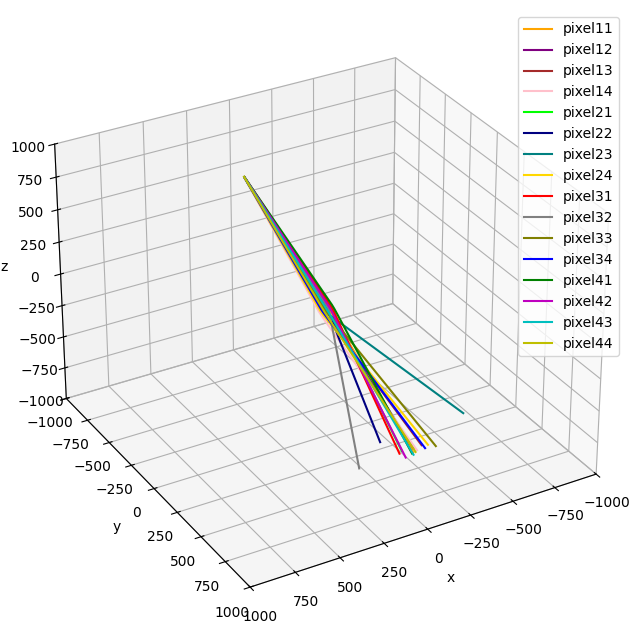

7342

In [93]:
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import patches
from mpl_toolkits.mplot3d import Axes3D
import gc

base_dir = '/home/pedro/Desktop/Jipole/output/'

colors = ['b', 'g', 'm', 'c', 'y', 'orange', 'purple', 'brown', 'pink', 'lime', 'navy', 'teal', 'gold', 'red', 'gray', 'olive']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(5):
    for j in range(5):
        if(i == 0 and j == 0):
            continue
        r_list = []
        th_list = []
        phi_list = []
        fname = os.path.join(base_dir, f'pixel{i}{j}_coordinates.txt')
        print(f"Processing file: {fname}")

        if not os.path.exists(fname):
            print(f"File {fname} does not exist, skipping.")
            continue
        with open(fname, 'r') as f:
            for line in f:
                if 'Step' in line:
                    parts = line.split(':', 1)[1]
                    assignments = parts.split(',')
                    r = float(assignments[0].split('=')[1])
                    th = float(assignments[1].split('=')[1])
                    phi = float(assignments[2].split('=')[1])
                    if (r == 0):
                        continue
                    r_list.append(r)
                    th_list.append(th)
                    phi_list.append(phi)
        if r_list:
            r = np.array(r_list)
            th = np.array(th_list)
            phi = np.array(phi_list)
            x = r * np.sin(th) * np.cos(phi)
            y = r * np.sin(th) * np.sin(phi)
            z = r * np.cos(th)
            color_idx = (i * 4 + j) % len(colors)
            ax.plot(x, y, z, color=colors[color_idx], label=f'pixel{i}{j}')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=30, azim=60)  # Adjust elev and azim as desired
ax.set_xlim(-1000, 1000)
ax.set_ylim(-1000, 1000)
ax.set_zlim(-1000, 1000)
plt.legend()
plt.show()
gc.collect()

# Plot camera position

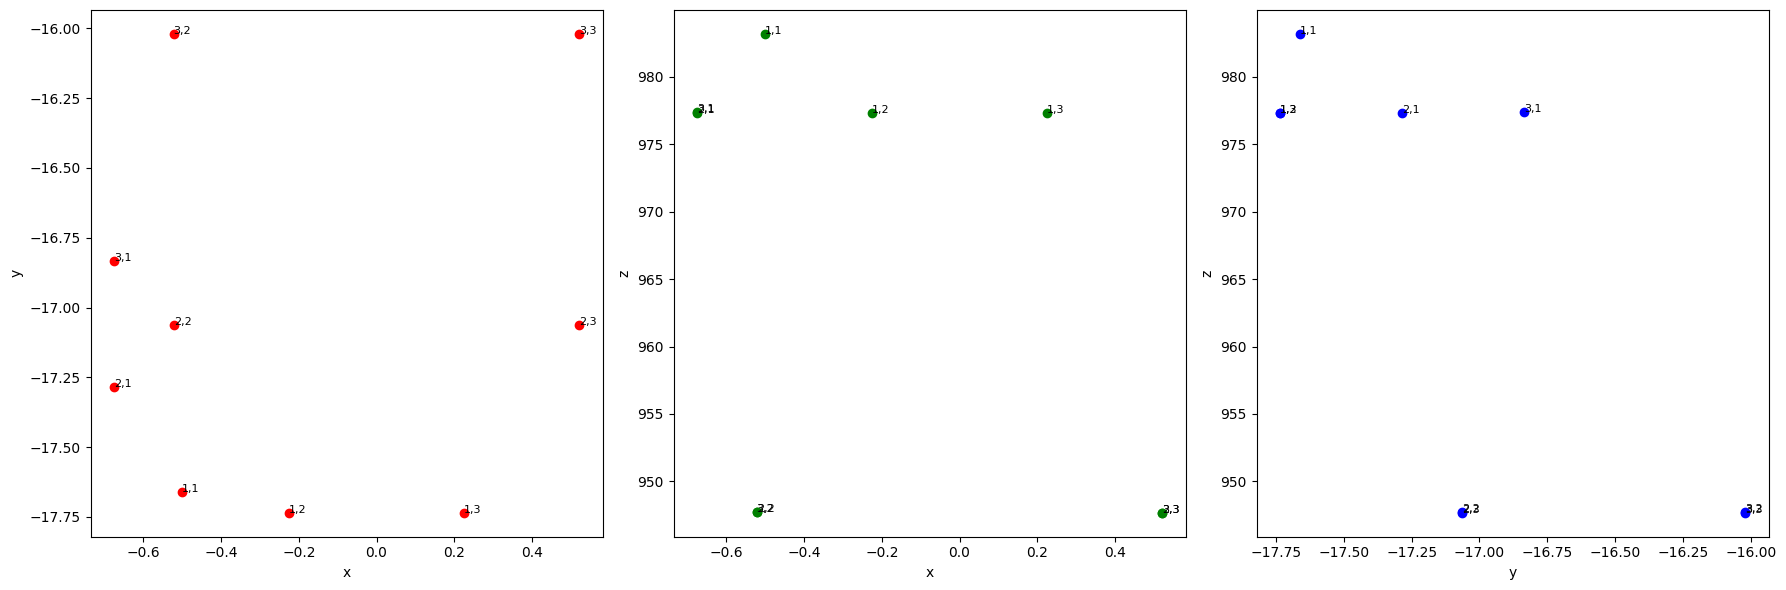

In [83]:
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import patches

# Directory containing the files
base_dir = '/home/pedro/Desktop/Jipole/output/'

colors = ['b', 'g', 'm', 'c', 'y', 'orange', 'purple', 'brown', 'pink', 'lime', 'navy', 'teal', 'gold', 'red', 'gray', 'olive']

# Arrays to store first points
x_points = []
y_points = []
z_points = []
pixel_labels = []

for i in range(4):
    for j in range(4):
        fname = os.path.join(base_dir, f'pixel{i}{j}_coordinates.txt')
        if not os.path.exists(fname):
            continue
        with open(fname, 'r') as f:
            for line in f:
                if 'Step' in line:
                    parts = line.split(':', 1)[1]
                    assignments = parts.split(',')
                    r = float(assignments[0].split('=')[1])
                    th = float(assignments[1].split('=')[1])
                    phi = float(assignments[2].split('=')[1])
                    if r == 0:
                        break
                    x = r * np.sin(th) * np.cos(phi)
                    y = r * np.sin(th) * np.sin(phi)
                    z = r * np.cos(th)
                    x_points.append(x)
                    y_points.append(y)
                    z_points.append(z)
                    pixel_labels.append(f'{i},{j}')
                    break 
# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].scatter(x_points, y_points, c='r')
for idx, label in enumerate(pixel_labels):
    axes[0].annotate(label, (x_points[idx], y_points[idx]), fontsize=8)
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')

# x-z plot
axes[1].scatter(x_points, z_points, c='g')
for idx, label in enumerate(pixel_labels):
    axes[1].annotate(label, (x_points[idx], z_points[idx]), fontsize=8)
axes[1].set_xlabel('x')
axes[1].set_ylabel('z')

# y-z plot
axes[2].scatter(y_points, z_points, c='b')
for idx, label in enumerate(pixel_labels):
    axes[2].annotate(label, (y_points[idx], z_points[idx]), fontsize=8)
axes[2].set_xlabel('y')
axes[2].set_ylabel('z')

plt.tight_layout()
plt.show()

# Plot Images

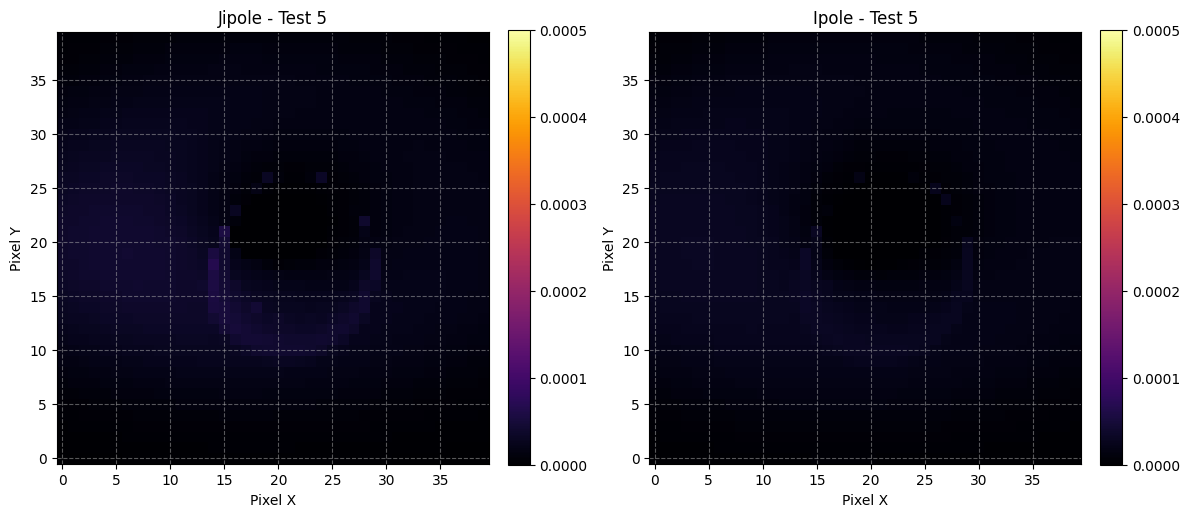

In [217]:
import numpy as np
import matplotlib.pyplot as plt

# Set the image dimensions (from your parameters.jl)
nx = 40
ny = 40

# Read the image data from the text files
path = "/home/pedro/Desktop/Jipole/output/Image.txt"
image = np.loadtxt(path).reshape((nx, ny))
#transpose jipole image, turn x to y


path2 = "/home/pedro/Desktop/Jipole/output/Image_ipole.txt"
image_ipole = np.loadtxt(path2).reshape((nx, ny))

# Set color scale limits
vmin = 0
vmax = 0.005

# Plot the images side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

im0 = axes[0].imshow(image, origin='lower', cmap='inferno', vmin=vmin, vmax=vmax)
axes[0].set_title('Jipole - Test 5')
axes[0].set_xlabel('Pixel X')
axes[0].set_ylabel('Pixel Y')
axes[0].grid(True, ls = '--', alpha = 0.5)
fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)

im1 = axes[1].imshow(image_ipole, origin='lower', cmap='inferno', vmin=vmin, vmax=vmax)
axes[1].set_title('Ipole - Test 5')
axes[1].set_xlabel('Pixel X')
axes[1].set_ylabel('Pixel Y')
fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)
axes[1].grid(True, ls = '--', alpha = 0.5)
plt.tight_layout()
plt.show()

### 